# **Paired Sample T-Test (Before vs After Campaign)**

A Paired Sample T-test (also known as the Dependent Sample T-test) is a statistical test used to compare the means of two related groups. The test is used to determine whether there is a statistically significant difference between the two related groups.

Why and When we should use it ?

- Paired Sample T-test when we want to assess the effect of a treatment or intervention on a group of subject by comparing therir measurements before and after the treatment or intervention.

- The same participants are measured in two conditions or at two points in time

- The observations are not independent but are paired based on some criteria

- **Before and After Studies:** When measuring the same group of individuals at two different times

- **Matched Pairs:** When each participant is matched with another participant who has similar characteristics, and you want to compare their responses in different conditions.

- **Repeated Measures:** When having repeated measurements from the same individuals under different conditions.


## Dataset

### Generating Dataset Code

In [ ]:
# import numpy as np
# import pandas as pd

# # Set random seed for reproducibility
# np.random.seed(42)

# # Number of participants
# n = 30

# # Generate 'Before Weight (kg)' with normal distribution (mean = 85kg, std = 5kg)
# before_weights = np.random.normal(loc=85, scale=5, size=n)

# # Generate 'Weight Loss (kg)' with normal distribution (mean = 4kg, std = 1.5kg)
# weight_loss = np.random.normal(loc=4, scale=1.5, size=n)

# # Ensure no participant has a negative "After Weight"
# after_weights = np.maximum(before_weights - weight_loss, 0)

# # Create a DataFrame
# data = pd.DataFrame({
#     'Participant': np.arange(1, n + 1),
#     'Before Weight (kg)': before_weights,
#     'After Weight (kg)': after_weights,
#     'Weight Loss (kg)': weight_loss,
# })

# # Calculate the weight loss percentage
# data['Weight Loss (%)'] = (data['Weight Loss (kg)'] / data['Before Weight (kg)']) * 100

# # Add the 'Difference' column (Before - After weights)
# data['Difference'] = data['Before Weight (kg)'] - data['After Weight (kg)']

# data.to_csv('C:/Github Repository/Advanced-Statistical-Methods-for-AB-and-Hypothesis-Testing-Methods-of-Experimentations/datasets/Paired Sample T-test/weight_loss.csv', index=False)


## Loading Dataset

In [47]:
import pandas as pd

data = pd.read_csv('C:/Github Repository/Advanced-Statistical-Methods-for-AB-and-Hypothesis-Testing-Methods-of-Experimentations/datasets/Paired Sample T-test/weight_loss.csv')

In [48]:
data.head()

,Participant,Before Weight (kg),After Weight (kg),Weight Loss (kg),Weight Loss (%),Difference
0,1,87.483571,84.386131,3.097440,3.540596,3.097440
1,2,84.308678,77.530261,6.778417,8.039999,6.778417
2,3,88.238443,84.258689,3.979754,4.510227,3.979754
3,4,92.615149,90.201716,2.413434,2.605873,2.413434
4,5,83.829233,78.595416,5.233817,6.243427,5.233817


## Dataset Summary

**Total Participants:** 100

**Columns:**

- **Participant:** Unique identifier for each participant (1 through 5).

- **Before Weight (kg):** The weight of each participant before the diet program.

- **After Weight (kg):** The weight of each participant after the diet program.

- **Weight Loss (kg):** The amount of weight lost by each participant.

- **Weight Loss (%):** The percentage of weight lost by each participant.

- **Difference :** Before Weight and After Weight difference 

## Shapiro-Wilk Test for Normality of Differences

In [49]:
from scipy import stats

shapiro_stat, shapiro_p_value = stats.shapiro(data['Difference'])

print(f"Shapiro-Wilk Test:\nStatistic = {shapiro_stat:.3f}, p-value = {shapiro_p_value:.5f}")
if shapiro_p_value < 0.05:
    print("\nThe differences between before and after weights are not normally distributed. We reject the null hypothesis of normality.")
else:
    print("\nThe differences between before and after weights appear to be normally distributed. We fail to reject the null hypothesis of normality.")

Shapiro-Wilk Test:
Statistic = 0.984, p-value = 0.91296

The differences between before and after weights appear to be normally distributed. We fail to reject the null hypothesis of normality.


**Since the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that the differences between the before and after weights appear to be normally distributed. This means the normality assumption for performing a Paired Sample T-Test is met.**

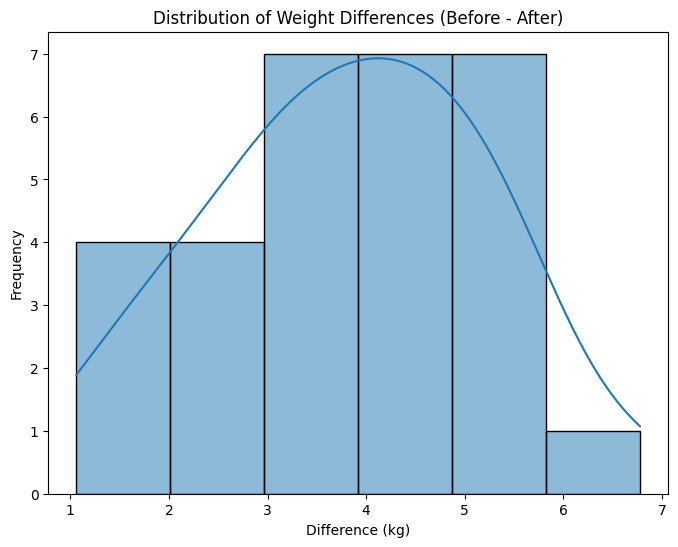

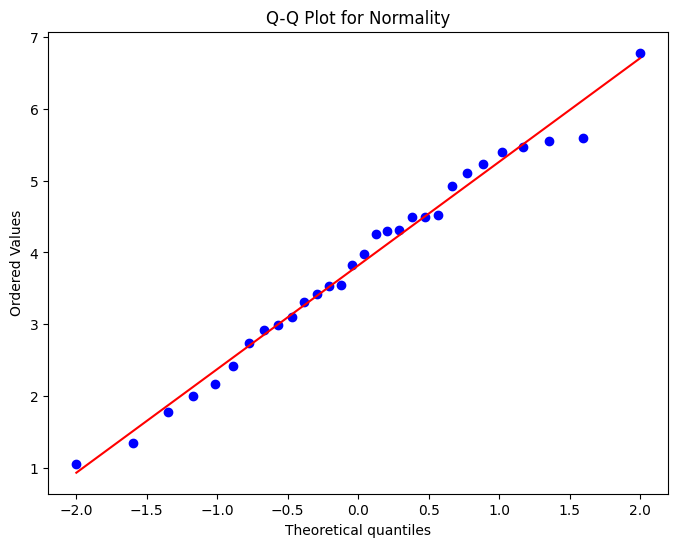

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data['Difference'], kde=True)
plt.title("Distribution of Weight Differences (Before - After)")
plt.xlabel("Difference (kg)")
plt.ylabel("Frequency")
plt.show()

# Q-Q plot for normality check
plt.figure(figsize=(8, 6))
stats.probplot(data['Difference'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Normality")
plt.show()


## Paired T-test Result

C:\Users\NIHAL\AppData\Local\Temp\ipykernel_9964\777138933.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Participant'], y=data['Difference'], palette="viridis")


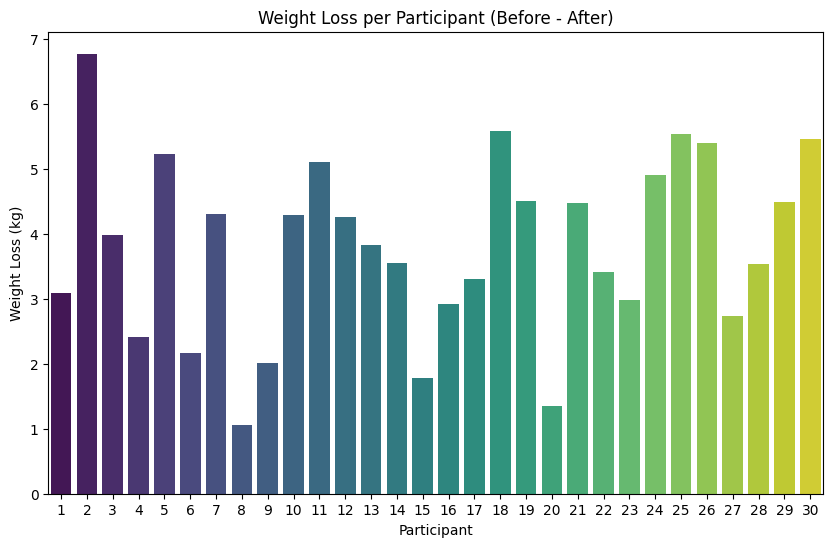

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data['Participant'], y=data['Difference'], palette="viridis")
plt.title("Weight Loss per Participant (Before - After)")
plt.xlabel("Participant")
plt.ylabel("Weight Loss (kg)")
plt.show()

In [52]:
t_statistic, p_value = stats.ttest_rel(data['Before Weight (kg)'], data['After Weight (kg)'])

print(f"\nPaired Sample T-Test:\nT-statistic = {t_statistic:.3f}, p-value = {p_value:.5f}")
if p_value < 0.05:
    print("\nReject the null hypothesis. There is a significant difference between before and after weights, indicating the diet program had an effect.")
else:
    print("\nFail to reject the null hypothesis. There is no significant difference between before and after weights.")


Paired Sample T-Test:
T-statistic = 14.974, p-value = 0.00000

Reject the null hypothesis. There is a significant difference between before and after weights, indicating the diet program had an effect.


**The p-value is less than 0.05, so we reject the null hypothesis and conclude that there is a significant difference between the before and after weights. This suggests that the diet program had a significant effect on the participants' weight loss.**